In [1]:
import os

os.chdir("/home/tales/dev/master/mdc_analysis/")
print("working dir", os.getcwd())

import pandas as pd
import matplotlib.pyplot as plt

import gc
from src.dao import csv_dao
from src.plot import plot
from src.utils import geo
from src.poi_grabber import google_places

from bokeh.io import output_notebook, show
output_notebook()

pd.set_option('display.float_format', lambda x: '%.4f' % x)

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from datetime import datetime, date
import calendar

working dir /home/tales/dev/master/mdc_analysis


Loading BokehJS ...

# Stop Region nearest POIs 

## Loading

In [2]:
# def valid_amenities(pois):
#     return pois[pois["amenity"].isna() == False]

def unique_stop_regions(knn_pois):
    unique_sr = knn_pois.drop_duplicates(subset=["lat_sr", "lon_sr"], keep="first")["sr_id"].tolist()
    return knn_pois[knn_pois["sr_id"].isin(unique_sr)]

def load_sr_knn_pois_for_all_users():
    users = csv_dao.list_stop_region_usernames()
    knn_pois = pd.DataFrame()
    
    for user in users:
        print("user_id: {}".format(user))
        try:
            user_knn_pois = csv_dao.load_sr_distance_to_close_pois_google_places(user)
            #print("User {} data loaded".format(user))
        except FileNotFoundError:
            continue
            
        user_knn_pois["user"] = user
        knn_pois = knn_pois.append(user_knn_pois)
    print("done!")
    return knn_pois

In [3]:
sr_knn_pois = load_sr_knn_pois_for_all_users()
print("All Stop Regions:    {}".format(len(sr_knn_pois["sr_id"].drop_duplicates())))
unique_sr_knn_pois = unique_stop_regions(sr_knn_pois)
print("Unique Stop Regions: {}".format(len(unique_sr_knn_pois["sr_id"].drop_duplicates())))

unique_sr_knn_pois.sample(6)

user_id: 6189
user_id: 5936
user_id: 6087
user_id: 5973
user_id: 6085
user_id: 6074
user_id: 6012
user_id: 5982
user_id: 5948
user_id: 5974
user_id: 6090
user_id: 6199
user_id: 6068
user_id: 6024
user_id: 5976
user_id: 6094
user_id: 5941
user_id: 5995
user_id: 5962
user_id: 6093
user_id: 6033
user_id: 6079
user_id: 6038
user_id: 6175
user_id: 6042
user_id: 5924
user_id: 6083
user_id: 6178
user_id: 5958
user_id: 6086
user_id: 6100
user_id: 5945
user_id: 5925
user_id: 5935
user_id: 6172
user_id: 5955
user_id: 6073
user_id: 5980
user_id: 6010
user_id: 5993
user_id: 6037
user_id: 5979
user_id: 5966
user_id: 5985
user_id: 5967
user_id: 5970
user_id: 6169
user_id: 6188
user_id: 6097
user_id: 6096
user_id: 6041
user_id: 6192
user_id: 6064
user_id: 6183
user_id: 5954
user_id: 5972
user_id: 6060
user_id: 6069
user_id: 5937
user_id: 6028
user_id: 5990
user_id: 6071
user_id: 5928
user_id: 5992
user_id: 6058
user_id: 6001
user_id: 5964
user_id: 5950
user_id: 5991
user_id: 6177
user_id: 5961
user_i

,distance,place_id,lat_sr,lon_sr,sr_id,position,user
16,351.9466,ChIJsX7Jyd96jEcRdrfLEO-Bgwc,46.1767,6.1394,5978_228,16,5978
24,103.3504,ChIJ-W0IyTLIjkcR8GCZlB-QeDM,46.1056,7.0770,5947_1842,24,5947
15,1540.3022,ChIJUTOuXS2CjkcRr6_kWSfFS8k,46.5366,6.8296,5938_2995,15,5938
14,97.3837,ChIJ3QaNzc4xjEcRrrghrLfwHxA,46.5245,6.6028,6097_3,14,6097
5,200.3979,ChIJnaRqjAe9jkcRGWu2PTXZIYE,46.2593,6.9527,5965_93,5,5965
28,1027.4933,ChIJL0WFAcSBjkcRCOqlPELFVRw,46.5751,6.8396,6177_2368,28,6177


In [4]:
#pois = csv_dao.load_hot_osm_pois()
valid_pois = google_places.load_all_google_places_data(valid_pois=True)[["place_id", "name", "latitude", "longitude", "types"]]
gc.collect()
print("{} valid pois".format(len(valid_pois)))
valid_pois.sample(6)

41792 valid pois


,place_id,name,latitude,longitude,types
place_id,,,,,
ChIJ2fHJSjGDjkcRVAQuTYTmy78,ChIJ2fHJSjGDjkcRVAQuTYTmy78,Gilamont,46.4714,6.8526,"[train_station, transit_station, point_of_inte..."
ChIJT5e7vMA5jkcRKjoOg726W7g,ChIJT5e7vMA5jkcRKjoOg726W7g,Podologie Pfister,46.9489,7.4436,"[doctor, health, point_of_interest, establishm..."
ChIJjxgE0EmdhkcRcnuJJ1oLhok,ChIJjxgE0EmdhkcRcnuJJ1oLhok,Viaggi Senza Confini Sagl,45.8336,9.0296,"[travel_agency, point_of_interest, establishment]"
ChIJ69wnbvnXkUcR2wXrq_BbqcM,ChIJ69wnbvnXkUcR2wXrq_BbqcM,Gate 68,47.2079,7.5392,"[bar, point_of_interest, establishment]"
ChIJmTwyeFhyjkcRPcOO5LNIxLo,ChIJmTwyeFhyjkcRPcOO5LNIxLo,"Westko, Les Résidences du Cerf SA",46.8806,7.0415,"[real_estate_agency, point_of_interest, establ..."
ChIJ82feSxQ3jEcRZ3r_GNCh_fM,ChIJ82feSxQ3jEcRZ3r_GNCh_fM,Bloody Cat Bar,46.5088,6.4988,"[bar, point_of_interest, establishment]"


In [5]:
print("Before dropping duplicates")
print(valid_pois["place_id"].value_counts().head(8))
print("\n")

unique_valid_pois = valid_pois.groupby(by=['place_id', "latitude", "longitude"], as_index=False).max()

print("After dropping duplicates")
print(unique_valid_pois["place_id"].value_counts().head(8))

print("{} valid pois".format(len(unique_valid_pois)))

Before dropping duplicates
ChIJKVe7Xkb7jUcRkAKW0z6RG9g    1
ChIJCa-kEGOfmkcRjTVMibroD-4    1
ChIJv-IJShlujEcRoPXETawRIYk    1
ChIJDwrYMy8ujEcRjDb1Ai7pB9c    1
ChIJq6qqqsaXjkcRHFwr_tFwcyo    1
ChIJ4S90KdV6jEcRnl2MuGfoH84    1
ChIJV9x6lOK8jkcRgdqGayGUHMs    1
ChIJg4mmMkxdjEcRnivHMQqiD2U    1
Name: place_id, dtype: int64


After dropping duplicates
ChIJKVe7Xkb7jUcRkAKW0z6RG9g    1
ChIJvxjeo8K3jkcR1AtAh2PPuM8    1
ChIJkU8kR3THhEcRFnefUnfmMUQ    1
ChIJlUklqNZ6jEcRB2lqbjkPDd0    1
ChIJRdSLF0x_kEcRpBoz4xhwfLc    1
ChIJWcpj1XMxjEcRNlaMzArxAEY    1
ChIJq0gZBpgfj0cRton3AXiaIYk    1
ChIJs5FDmct4kEcRPD5MHIuszZQ    1
Name: place_id, dtype: int64
41792 valid pois


## Merging dataframes

In [6]:
unique_sr_knn_pois = unique_sr_knn_pois.merge(unique_valid_pois, how="inner", on="place_id")
unique_sr_knn_pois.sort_values(by=["sr_id", "position"]).head()

,distance,place_id,lat_sr,lon_sr,sr_id,position,user,latitude,longitude,name,types
843855,11.1678,ChIJGQNWSO0fj0cRBr5OP5rEP8Q,46.2920,7.5327,5924_100,0,5924,46.2921,7.5325,Daily,"[bakery, food, store, point_of_interest, estab..."
843800,19.9764,ChIJO7YXHwwfj0cRiUSrx6CNyEk,46.2920,7.5327,5924_100,1,5924,46.2922,7.5328,Sierre/Siders,"[train_station, transit_station, point_of_inte..."
843685,22.6090,ChIJQbFTHgwfj0cRN19xud96YfI,46.2920,7.5327,5924_100,2,5924,46.2922,7.5328,Centre SIPE,"[health, point_of_interest, establishment]"
843742,22.6090,ChIJQbFTHgwfj0cRi49QnfkX1y4,46.2920,7.5327,5924_100,3,5924,46.2922,7.5328,"Docteur DOVEZE, CMDS Santé - Cabinet Médical","[doctor, health, point_of_interest, establishm..."
843911,24.8282,ChIJJaVaAwwfj0cRRcaUKEXW-9E,46.2920,7.5327,5924_100,4,5924,46.2922,7.5329,Coop Pronto,"[grocery_or_supermarket, food, store, point_of..."


## Removing Home and Work Stop Regions

In [7]:
# def remove_home_and_work_sr(data):
    
#     for user_id in users = csv_dao.list_stop_region_usernames():
#         home_sr_ids = csv_dao.load_home_inferred_sr_ids()
#         work_sr_ids = csv_dao.load_work_inferred_sr_ids()

#     return data[~data["sr_id"].isin(home_sr_ids + work_sr_ids)]

In [8]:
# print(len(unique_sr_knn_pois))
# unique_sr_knn_pois = remove_home_and_work_sr(unique_sr_knn_pois)
# print(len(unique_sr_knn_pois))

## How far to the Stop Regions are the POIs?

In [9]:
home_and_work = []
for user_id in unique_sr_knn_pois["user"].drop_duplicates().tolist():
    home_and_work = home_and_work + csv_dao.load_home_inferred_sr_ids(user_id) + csv_dao.load_work_inferred_sr_ids(user_id)

In [10]:
home_and_work_sr_knn_pois = unique_sr_knn_pois[unique_sr_knn_pois["sr_id"].isin(home_and_work)]
unique_sr_knn_pois = unique_sr_knn_pois[~unique_sr_knn_pois["sr_id"].isin(home_and_work)]
gc.collect()

329

In [11]:
print("HOME and WORK stop regions")
print(len(home_and_work_sr_knn_pois), "rows")
home_and_work_sr_knn_pois.sample(6)

HOME and WORK stop regions
424350 rows


,distance,place_id,lat_sr,lon_sr,sr_id,position,user,latitude,longitude,name,types
1512752,101.3790,ChIJIzQuVYCuj0cRbtXpARg3LhE,46.6819,7.6779,5964_554,0,5964,46.6817,7.6791,Malergeschäft Marc Heim,"[painter, point_of_interest, establishment]"
1118262,793.5552,ChIJO9kawLucjkcRoEnKZSwWIM0,46.4498,6.8707,6188_6,29,6188,46.4517,6.8607,Phare-Elim,"[health, point_of_interest, establishment]"
225682,251.2007,ChIJPxCL6P0wjEcRBuYjSECPL5I,46.5211,6.5693,6003_619,18,6003,46.5197,6.5668,SUSHI ZEN Epfl,"[meal_takeaway, restaurant, food, point_of_int..."
488304,171.5646,ChIJVdkwBwMxjEcR6uWN6xZEWm4,46.5252,6.5660,5993_2677,11,5993,46.5238,6.5651,Consultation Dermatologie Dr Gambillara,"[doctor, health, point_of_interest, establishm..."
810689,249.9344,ChIJ0X7i4rYxjEcRm__BH5yu_7s,46.5450,6.5764,6057_3,15,6057,46.5434,6.5788,Sam,"[restaurant, food, point_of_interest, establis..."
1011645,146.5986,ChIJA7yNDU8zjEcR4WoQvpG5AvQ,46.5723,6.6298,6178_1490,22,6178,46.5712,6.6287,RLX Training SA,"[gym, health, point_of_interest, establishment]"


In [12]:
print("Other stop regions")
print(len(unique_sr_knn_pois), "rows")
unique_sr_knn_pois.sample(6)

Other stop regions
1198722 rows


,distance,place_id,lat_sr,lon_sr,sr_id,position,user,latitude,longitude,name,types
1115337,16384.2022,ChIJSxC0-U0ejkcRzxk4t4SROvM,47.3034,7.1583,6180_104,7,6180,47.1610,7.2144,Banque Raiffeisen Orvin,"[bank, finance, point_of_interest, establishment]"
658821,2198.2623,ChIJAUxDsBi2jkcRiG7Ufyi3bJY,46.0756,7.0332,5990_69,20,5990,46.0876,7.0557,CHRISTIAN CONSTANTIN SA Architecte - Entrepris...,"[general_contractor, point_of_interest, establ..."
7589,164.5216,ChIJHXJolRMujEcRI29cMDvpviM,46.5420,6.6444,6189_244,12,6189,46.5419,6.6422,Profilmétal S.A.,"[locksmith, point_of_interest, establishment]"
143628,198.1075,ChIJ-VYUsKsvjEcRqi7XCF1qZM0,46.5132,6.6566,5974_551,21,5974,46.5125,6.6590,Mrs. Marie Pexieder,"[doctor, health, point_of_interest, establishm..."
160731,926.3891,ChIJJwQuKtCZjkcRo-vAsmVcnfg,46.3444,6.9363,6020_1094,18,6020,46.3524,6.9326,JM Agencement d'Intérieur,"[home_goods_store, store, point_of_interest, e..."
1195194,4902.2913,ChIJc0B-1HlwjEcRhgeOYD3EJZs,46.1303,6.1446,6038_308,26,6038,46.1666,6.1807,Dojo Camv-Centre D'arts Martiaux De Veyrier,"[school, point_of_interest, establishment]"


In [13]:
firsts = unique_sr_knn_pois[["distance", "lat_sr", "lon_sr", "sr_id", "position", "user"]].groupby("sr_id")["distance"].apply(lambda x : x.min())
seconds = unique_sr_knn_pois[["distance", "lat_sr", "lon_sr", "sr_id", "position", "user"]].groupby("sr_id")["distance"].apply(lambda x : x.nsmallest(2).max())
thirds = unique_sr_knn_pois[["distance", "lat_sr", "lon_sr", "sr_id", "position", "user"]].groupby("sr_id")["distance"].apply(lambda x : x.nsmallest(3).max())

In [14]:
firsts.describe()

count   40322.0000
mean      164.9224
std       521.1493
min         0.0000
25%        16.5470
50%        34.1574
75%        85.0617
max     20538.1884
Name: distance, dtype: float64

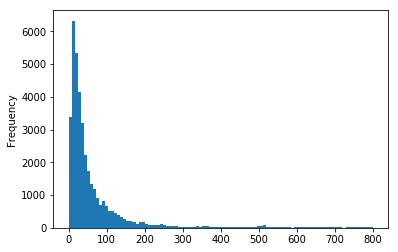

In [15]:
firsts.plot.hist(bins=100, range=(0, 800))

In [16]:
seconds.describe()

count   40322.0000
mean      275.7237
std       830.3325
min         0.5403
25%        27.2755
50%        55.9439
75%       142.2743
max     20589.9820
Name: distance, dtype: float64

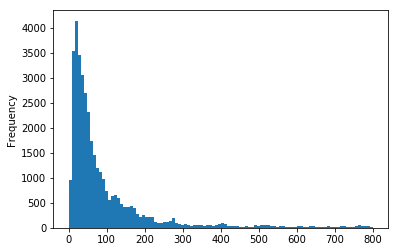

In [17]:
seconds.plot.hist(bins=100, range=(0, 800))

In [18]:
thirds.describe()

count   40322.0000
mean      367.7054
std      1015.6413
min         0.5403
25%        34.0033
50%        77.9714
75%       208.8055
max     21238.1221
Name: distance, dtype: float64

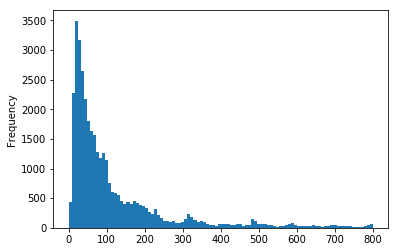

In [19]:
thirds.plot.hist(bins=100, range=(0, 800))

## Closer POIs frequency of types

tipo lugar que o cara costuma frequentar... :)

In [20]:
closests_types = unique_sr_knn_pois[unique_sr_knn_pois["position"] == 0]
closests_types.head()

,distance,place_id,lat_sr,lon_sr,sr_id,position,user,latitude,longitude,name,types
0,96.6666,ChIJJ_mJ4RIujEcRnb7281kGxsk,46.5424,6.6442,6189_122,0,6189,46.5431,6.6449,Serrurerie Häfliger Lausanne,"[locksmith, point_of_interest, establishment]"
4,114.5729,ChIJJ_mJ4RIujEcRnb7281kGxsk,46.5421,6.6443,6189_140,0,6189,46.5431,6.6449,Serrurerie Häfliger Lausanne,"[locksmith, point_of_interest, establishment]"
5,115.8284,ChIJJ_mJ4RIujEcRnb7281kGxsk,46.5421,6.6444,6189_138,0,6189,46.5431,6.6449,Serrurerie Häfliger Lausanne,"[locksmith, point_of_interest, establishment]"
11,45.9055,ChIJJ_mJ4RIujEcRnb7281kGxsk,46.5427,6.6447,6189_149,0,6189,46.5431,6.6449,Serrurerie Häfliger Lausanne,"[locksmith, point_of_interest, establishment]"
34,109.2428,ChIJJ_mJ4RIujEcRnb7281kGxsk,46.5424,6.6439,6189_150,0,6189,46.5431,6.6449,Serrurerie Häfliger Lausanne,"[locksmith, point_of_interest, establishment]"


In [21]:
all_closest_types = pd.Series(closests_types["types"].sum())
all_closest_types.value_counts().head(10)

establishment        38892
point_of_interest    38892
food                  8266
store                 8062
restaurant            5608
health                4504
transit_station       4206
bus_station           3633
lodging               2626
school                1903
dtype: int64

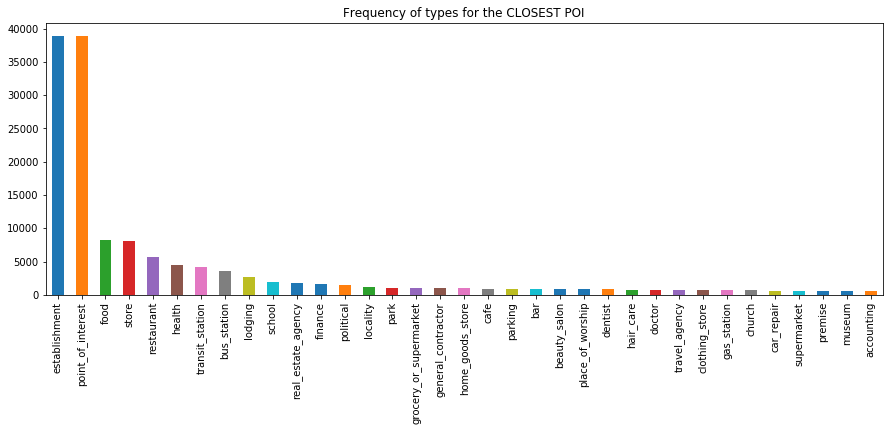

In [22]:
f, ax = plt.subplots(figsize=(15,5))
all_closest_types.value_counts().head(35).plot.bar(title="Frequency of types for the CLOSEST POI")

### Removing 'establishment' and 'point_of_interest'

In [23]:
all_closest_types = all_closest_types[(all_closest_types != "establishment") & (all_closest_types != "point_of_interest")]

In [24]:
all_closest_types.value_counts().head(10)

food                  8266
store                 8062
restaurant            5608
health                4504
transit_station       4206
bus_station           3633
lodging               2626
school                1903
real_estate_agency    1716
finance               1649
dtype: int64

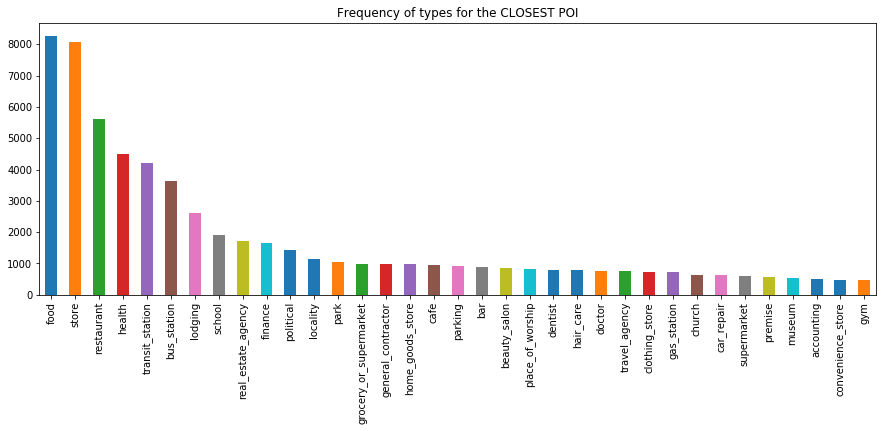

In [25]:
f, ax = plt.subplots(figsize=(15,5))
all_closest_types.value_counts().head(35).plot.bar(title="Frequency of types for the CLOSEST POI")

## Plot Stop Regions and POIs

In [26]:
from bokeh.tile_providers import CARTODBPOSITRON
from bokeh.models import HoverTool 

def centroid_figure_mouseover(centroids, title="", lat_col="latitude", lon_col="longitude", 
                              width=800, height=600, legend=None, point_color="magenta", 
                              point_size=3, fill_color="magenta", cluster_alpha=0.3):

    locs = centroids.apply(lambda centroid : geo.gps_loc_to_web_mercator(lat=centroid[lat_col], lon=centroid[lon_col]), axis=1)
    centroids["lon_sr"] = locs.apply(lambda loc: loc[0])
    centroids["lat_sr"] = locs.apply(lambda loc: loc[1])
    
    centroids["start_time"] = centroids["local_start_time"].apply(lambda row : datetime.utcfromtimestamp(row).strftime('%Y-%m-%d %H:%M:%S'))
    centroids["end_time"] = centroids["local_end_time"].apply(lambda row : datetime.utcfromtimestamp(row).strftime('%Y-%m-%d %H:%M:%S'))
    
    centroids["start_weekday"] = centroids["local_start_time"].apply(lambda row : calendar.day_name[datetime.utcfromtimestamp(row).weekday()])
    centroids["end_weekday"] = centroids["local_end_time"].apply(lambda row : calendar.day_name[datetime.utcfromtimestamp(row).weekday()])
    
    centroids = centroids.drop_duplicates(subset="sr_id")
            
    sr_source = ColumnDataSource(data=dict(
        lon=centroids["lon_sr"].tolist(),
        lat=centroids["lat_sr"].tolist(),
        start_time=centroids["start_time"].tolist(),
        end_time=centroids["end_time"].tolist(),
        start_weekday=centroids["start_weekday"].tolist(),
        end_weekday=centroids["end_weekday"].tolist(),
        sr_id=centroids["sr_id"].tolist()
    ))
    
    TOOLTIPS = [
        ("sr_id", "@sr_id"),
        ("start_time", "@start_time"),
        ("start_weekday", "@start_weekday"),
        ("  end_time", "@end_time"),
        ("  end_weekday", "@end_weekday")
    ]
    
    fig = plot.mercator_fig("", width=width, height=height)

    fig.circle("lon", "lat", color=point_color, size=3,
                   source=sr_source, legend=legend)
    
    centroid_circle = fig.circle("lon", "lat", color=point_color, size=3,
                   source=sr_source)

    fig.add_tools(HoverTool(renderers=[centroid_circle], tooltips=TOOLTIPS))
    
    glyph = centroid_circle.glyph
    glyph.size = 20
    glyph.fill_alpha = cluster_alpha
    glyph.fill_color = fill_color
    glyph.line_alpha = cluster_alpha
    glyph.line_color = "firebrick"
    glyph.line_dash = [6, 3]
    glyph.line_width = 1
    
    return fig

In [27]:
from src.plot import plot
from bokeh.plotting import figure, ColumnDataSource

def useful_types(types):
    if "establishment" in types:
        del [types[types.index("establishment")]]
    
    if "point_of_interest" in types:
        del [types[types.index("point_of_interest")]]
    
    return types

def plot_sr_knn_pois(sr_knn_pois_data, user_home=None, user_work=None, title="", width=800, height=600):
    pois_locs = sr_knn_pois_data.apply(lambda poi : geo.gps_loc_to_web_mercator(lat=poi["latitude"], lon=poi["longitude"]), axis=1)
    sr_knn_pois_data["lon_mercator"] = pois_locs.apply(lambda loc: loc[0])
    sr_knn_pois_data["lat_mercator"] = pois_locs.apply(lambda loc: loc[1])
    
    stop_regions_data = pd.DataFrame()
    for user in sr_knn_pois_data["user"].drop_duplicates().tolist():
        stop_regions_data = stop_regions_data.append(csv_dao.load_user_stop_regions_centroids(user_id=user))
        
    sr_knn_pois_data = sr_knn_pois_data.merge(stop_regions_data[["sr_id", "local_start_time", "local_end_time"]], on="sr_id", how="left")
        
    stop_regions_data = None
    gc.collect()
    
    p = centroid_figure_mouseover(sr_knn_pois_data, title="Stop Regions and close POIs" , lat_col="lat_sr", lon_col="lon_sr", width=width, height=height, legend="stop_region")

    sr_knn_pois_data = sr_knn_pois_data.sort_values("position").drop_duplicates(subset=["sr_id", "place_id"], keep="first")
    
    sr_knn_pois_data["show_types"] = sr_knn_pois_data["types"].apply(lambda types : str(useful_types(types)))
    
    closest = sr_knn_pois_data[sr_knn_pois_data["position"] == 0]
    poi_data = sr_knn_pois_data[sr_knn_pois_data["position"] != 0].sort_values("position").drop_duplicates(subset=["sr_id", "place_id"], keep="first")
       
    poi_source = ColumnDataSource(data=dict(
        lon=poi_data["lon_mercator"].tolist(),
        lat=poi_data["lat_mercator"].tolist(),
        position=poi_data["position"].tolist(),
        distance=poi_data["distance"].tolist(),
        show_types=poi_data["show_types"].tolist(),
        sr_id=poi_data["sr_id"].tolist()
    ))
    
    closest_poi_source = ColumnDataSource(data=dict(
        lon=closest["lon_mercator"].tolist(),
        lat=closest["lat_mercator"].tolist(),
        position=closest["position"].tolist(),
        distance=closest["distance"].tolist(),
        show_types=closest["show_types"].tolist(),
        sr_id=closest["sr_id"].tolist()
    ))
    
    TOOLTIPS = [
        ("position", "@position"),
        ("types", "@show_types"),
        ("distance", "@distance"),
        ("sr_id", "@sr_id")
    ]

    circle = p.circle(x="lon", y="lat", 
                      size=7, alpha=0.5, color="red", legend="poi", source=poi_source)

    closest_circle = p.circle(x="lon", y="lat", 
                              size=7, alpha=0.5, color="#005073", legend="closest poi", source=closest_poi_source)
    
    p.add_tools(HoverTool(renderers=[circle], tooltips=TOOLTIPS))
    p.add_tools(HoverTool(renderers=[closest_circle], tooltips=TOOLTIPS))
    
    if not user_home is None:
        plot.plot_stop_regions_centroids(user_home, legend="home", fill_color="green", lat_col="lat_sr", lon_col="lon_sr", p=p)
    if not user_work is None:
        plot.plot_stop_regions_centroids(user_work, legend="work", fill_color="orange", lat_col="lat_sr", lon_col="lon_sr", p=p)
    
    print(closest["distance"].median())
    return p

In [28]:
print(len(unique_sr_knn_pois[unique_sr_knn_pois["user"] == "6170"]))

14855


In [29]:
user_id = "6104"

user_data = unique_sr_knn_pois[(unique_sr_knn_pois["user"] == user_id) & (unique_sr_knn_pois["position"] <= 4)]
print("user data done!")
user_hw = home_and_work_sr_knn_pois[home_and_work_sr_knn_pois["user"] == user_id]

user_home = user_hw[user_hw["sr_id"].isin(csv_dao.load_home_inferred_sr_ids(user_id))].drop_duplicates(["lat_sr", "lon_sr"])
user_work = user_hw[user_hw["sr_id"].isin(csv_dao.load_work_inferred_sr_ids(user_id))].drop_duplicates(["lat_sr", "lon_sr"])
print("user_hw")

print(len(user_data), len(user_home), len(user_work))

p = plot_sr_knn_pois(user_data, user_home, user_work, title="user_id: {}".format(user_id), width=800, height=600)
show(p)

user data done!
user_hw
340 73 5
24.993148395185088


sr 6104_94

## Plot Isolated Stop Regions

#### Closest POIs distance by user

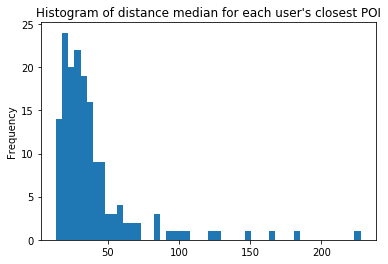

In [30]:
unique_sr_knn_pois[(unique_sr_knn_pois["position"] == 0)].groupby("user")["distance"].describe()["50%"].plot.hist(bins=50, title="Histogram of distance median for each user's closest POI")

In [31]:
print("Median of closest POI for some users")
unique_sr_knn_pois[(unique_sr_knn_pois["position"] == 0)].groupby("user")["distance"].describe()["50%"].sort_values(ascending=False).head(10)

Median of closest POI for some users


user
6187   227.4320
6174   184.4807
6026   165.7747
6024   147.0794
6109   125.2931
5974   122.4762
5969   103.9966
5953   101.2325
6014    98.4394
5949    92.9538
Name: 50%, dtype: float64

#### Isolated Stop Regions

In [32]:
isolated = unique_sr_knn_pois[(unique_sr_knn_pois["position"] == 0)].sort_values(by="distance", ascending=False)
isolated.head(15)

,distance,place_id,lat_sr,lon_sr,sr_id,position,user,latitude,longitude,name,types
392949,20538.1884,ChIJI2zkfRLZjkcRBVJ5we-5k80,45.9886,7.3581,6063_267,0,6063,46.1726,7.3823,Chalet l'Aire,"[lodging, point_of_interest, establishment]"
392948,20359.7966,ChIJI2zkfRLZjkcRBVJ5we-5k80,45.9903,7.3570,6063_268,0,6063,46.1726,7.3823,Chalet l'Aire,"[lodging, point_of_interest, establishment]"
1315858,10451.3969,ChIJl4LmuHdWhUcRlfqbBVbQqCw,46.9612,8.4846,6178_127,0,6178,47.0552,8.4812,Kessiboden,"[restaurant, food, point_of_interest, establis..."
758926,10231.1083,ChIJTwSa3QvkkUcRQeoHxkRXNf4,47.3534,7.3838,6180_137,0,6180,47.3037,7.2699,Soulce,"[locality, political]"
1460015,9814.4962,ChIJp4sMxTJ-j0cRXtjVA9aC4D0,46.5614,8.3352,6034_787,0,6034,46.4872,8.2659,Ferienwohnung Josefine Kraft,"[lodging, point_of_interest, establishment]"
1098722,8757.7529,ChIJbwGPPNK3hUcRNrdhrQmB-Q8,46.2514,8.8437,6094_529,0,6094,46.1789,8.7989,Orselina,"[locality, political]"
1098726,8734.3611,ChIJbwGPPNK3hUcRNrdhrQmB-Q8,46.2511,8.8438,6094_532,0,6094,46.1789,8.7989,Orselina,"[locality, political]"
1098718,8708.3585,ChIJbwGPPNK3hUcRNrdhrQmB-Q8,46.2509,8.8435,6094_530,0,6094,46.1789,8.7989,Orselina,"[locality, political]"
1098725,8702.2764,ChIJbwGPPNK3hUcRNrdhrQmB-Q8,46.2509,8.8433,6094_531,0,6094,46.1789,8.7989,Orselina,"[locality, political]"
1098720,8690.2563,ChIJbwGPPNK3hUcRNrdhrQmB-Q8,46.2505,8.8443,6094_528,0,6094,46.1789,8.7989,Orselina,"[locality, political]"


In [33]:
p = plot_sr_knn_pois(isolated.head(15), user_home=None, user_work=None, title="user_id: {}".format(user_id), width=800, height=600)
show(p)

8708.358470158384


#### It seems that places far from urban centers 

In [34]:
hot_osm = csv_dao.load_hot_osm_pois(valid_pois=True)
hot_osm["latitude"] = hot_osm["lat_4326"]
hot_osm["longitude"] = hot_osm["lon_4326"]
print(len(hot_osm))
hot_osm.head()

184105


,osm_id,latitude,longitude,access,addr:housename,addr:housenumber,addr:interpolation,admin_level,aerialway,aeroway,amenity,area,barrier,bicycle,brand,bridge,boundary,building,capital,construction,covered,culvert,cutting,denomination,disused,ele,embankment,foot,generator:source,harbour,highway,historic,horse,intermittent,junction,landuse,layer,leisure,lock,man_made,military,motorcar,name,natural,office,oneway,operator,place,poi,population,power,power_source,public_transport,railway,ref,route,service,shop,sport,surface,toll,tourism,tower:type,tunnel,water,waterway,wetland,width,wood,z_order,way,lon_4326,lat_4326,building_+_religion
0,1833394793,46.0316,5.8886,NaN,NaN,NaN,NaN,nan,NaN,NaN,school,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,nan,010100002031BF0D00A4703D0A34012441EC51B8DED011...,5.8886,46.0316,NaN
1,3216662613,46.0428,5.8859,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,memorial,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,nan,010100002031BF0D00D7A370BDDFFE2341CDCCCC8C9313...,5.8859,46.0428,NaN
2,3255532022,46.0103,5.9192,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan,ESSeyssel,NaN,nan,nan,terminal,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,nan,010100002031BF0D007B14AE47E01B244152B81E957D0E...,5.9192,46.0103,NaN
3,1816270919,46.0066,5.9563,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,wayside_cross,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,nan,010100002031BF0D00A4703D0A193C24415C8FC265E70D...,5.9563,46.0066,NaN
4,1816270924,46.0074,5.9656,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,picnic_site,NaN,NaN,NaN,NaN,nan,nan,NaN,nan,010100002031BF0D003D0AD7A331442441EC51B8FE080E...,5.9656,46.0074,NaN


In [35]:
sliced = pd.DataFrame()

for index, row in isolated.head(15).iterrows():
    osm_close = geo.slice_geo_data2(hot_osm, center_lat=row["latitude"], center_lon=row["longitude"], search_tolerance=0.005)
    sliced = sliced.append(osm_close)

print(len(sliced))

153


In [36]:
p = plot.plot_user_loc(sliced, lat_col="lat_4326", lon_col="lon_4326", p=p, legend="hot osm", color="orange")
show(p)

Hot OSM POIs did not added POIs close to isolated Stop Regions